In [1]:
import pandas as pd

In [2]:
data=pd.read_csv('/content/heart.csv')

In [3]:
#checking missing values
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
#checking duplicate values
data_dup =data.duplicated().any()

In [7]:
data_dup

True

In [8]:
data=data.drop_duplicates()

In [9]:
data_dup =data.duplicated().any()
data_dup

False

In [10]:
# data processing

cate_val=[]
cont_val=[]
for column in data.columns:
  if data[column].nunique()<=10:
    cate_val.append(column)
  else:
    cont_val.append(column)


In [11]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [12]:
cont_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [14]:
# encoding categorical data

data['cp'].unique()

array([0, 1, 2, 3])

In [15]:
cate_val.remove('sex')
cate_val.remove('target')
data=pd.get_dummies(data,columns=cate_val,drop_first=True)
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,53,1,140,203,155,3.1,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,70,1,145,174,125,2.6,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,61,1,148,203,161,0.0,0,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,62,0,138,294,106,1.9,0,False,False,False,...,False,True,False,False,False,True,False,False,True,False


In [16]:
# feature scalling

from sklearn.preprocessing import StandardScaler
st=StandardScaler()
data[cont_val]=st.fit_transform(data[cont_val])

In [17]:
# splitting dataset into training & testing

x=data.drop('target',axis=1)
y=data['target']

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [20]:
y_test

245    1
349    0
135    0
389    1
66     1
      ..
402    1
123    1
739    0
274    1
256    1
Name: target, Length: 61, dtype: int64

In [21]:
# logistic regression

from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(x_train,y_train)

LogisticRegression()

In [22]:
y_pred=log.predict(x_test)

In [23]:
# checking accuracy

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7868852459016393

In [24]:
# using SVM model

from sklearn.svm import SVC
svm=SVC()
svm.fit(x_train,y_train)

SVC()

In [25]:
y_pred2=svm.predict(x_test)

In [27]:
accuracy_score(y_test,y_pred2)

0.8032786885245902

In [28]:
# KNN Classifier

from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [30]:
y_pred3=knn.predict(x_test)

In [31]:
accuracy_score(y_test,y_pred3)

0.7377049180327869

In [32]:
score=[]

for k in range(1,40):
   knn=KNeighborsClassifier(n_neighbors=k)
   knn.fit(x_train,y_train)
   y_pred4=knn.predict(x_test)
   score.append(accuracy_score(y_test,y_pred4))

In [33]:
score

[0.7213114754098361,
 0.8032786885245902,
 0.7049180327868853,
 0.7049180327868853,
 0.7377049180327869,
 0.8032786885245902,
 0.7868852459016393,
 0.8032786885245902,
 0.7704918032786885,
 0.7540983606557377,
 0.7704918032786885,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7540983606557377,
 0.7704918032786885,
 0.7540983606557377,
 0.7540983606557377,
 0.7377049180327869,
 0.7540983606557377,
 0.7377049180327869,
 0.7213114754098361,
 0.7377049180327869,
 0.7377049180327869,
 0.7213114754098361,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869]

In [37]:
# Non linear ML Algorithm

data=pd.read_csv('/content/heart.csv')
data=data.drop_duplicates()
data.shape

(302, 14)

In [38]:
x=data.drop('target',axis=1)
y=data['target']

In [39]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [40]:
# decision tree classifier

from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [41]:
y_pred4=dt.predict(x_test)

In [43]:
accuracy_score(y_test,y_pred4)

0.7540983606557377

In [44]:
# Random forest classifier

from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [45]:
y_pred5=rf.predict(x_test)

In [48]:
accuracy_score(y_test,y_pred5)

0.819672131147541

In [50]:
# Gradient Boosting Classifier

from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)

GradientBoostingClassifier()

In [51]:
gbc.fit(x_train,y_train)

GradientBoostingClassifier()

In [52]:
y_pred6=gbc.predict(x_test)

In [53]:
accuracy_score(y_test,y_pred6)

0.8032786885245902

In [56]:
final_data=pd.DataFrame({'Models':['LR','SVM','KNN','DT','RF','GB'],
                         'ACC':[accuracy_score(y_test,y_pred),
                                accuracy_score(y_test,y_pred2),
                                accuracy_score(y_test,y_pred3),
                                accuracy_score(y_test,y_pred4),
                                accuracy_score(y_test,y_pred5),
                                accuracy_score(y_test,y_pred6),
                                ]})

In [57]:
final_data

,Models,ACC
0,LR,0.786885
1,SVM,0.803279
2,KNN,0.737705
3,DT,0.754098
4,RF,0.819672
5,GB,0.803279


<Axes: xlabel='Models', ylabel='ACC'>

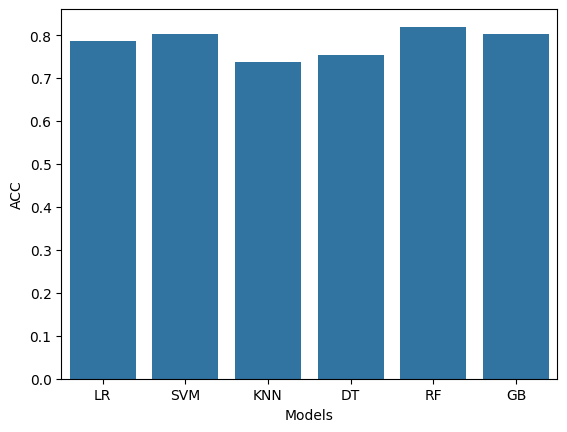

In [59]:
import seaborn as sns

# Assuming final_data is a DataFrame
sns.barplot(x='Models', y='ACC', data=final_data)

In [60]:
# training Random forest Classifier on entire dataset

from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x,y)

RandomForestClassifier()

In [61]:
# prediction on new data

import pandas as pd

In [62]:
new_data=pd.DataFrame({
    'age':52,
    'sex':1,
    'cp':0,
    'trestbps':125,
    'chol':212,
    'fbs':0,
    'restecg':1,
    'thalach':168,
    'exang':0,
    'oldpeak':1.0,
    'slope':2,
    'ca':2,
    'thal':3
},index=[0])


In [63]:
new_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3


In [65]:
p = rf.predict(new_data)
if p[0]==0:
  print(f'Person does not have heart disease')
else:
  print(f'Person has heart disease')

Person does not have heart disease


In [66]:
# saving model using joblib

import joblib
joblib.dump(rf,'model_joblib_heart')

['model_joblib_heart']

In [67]:
model =joblib.load('model_joblib_heart')

In [68]:
model.predict(new_data)

array([0])

In [70]:
# GUI

import tkinter as tk
from tkinter import *
import joblib

In [73]:
master= Tk()
master.title("Heart Disease Prediction")
Label=Label(master,text="Heart Disease Prediction",bg="black",
            fg="white").grid(row=0,columnspan=2)

Label(master,text="Enter Your Age").grid(row=1)
Label(master,text="Male or Female [1/0]").grid(row=2)
Label(master,text="Enter Value of CP").grid(row=3)
Label(master,text="Enter value of trestbps").grid(row=4)
Label(master,text="Enter value of chol").grid(row=5)
Label(master,text="Enter value of fbs").grid(row=6)
Label(master,text="Enter value of restecg").grid(row=7)
Label(master,text="Enter value of thalach").grid(row=8)
Label(master,text="Enter value of exang").grid(row=9)
Label(master,text="Enter value of oldpeak").grid(row=10)
Label(master,text="Enter value of slope").grid(row=11)
Label(master,text="Enter value of thal").grid(row=12)


e1=Entry(master)
e2=Entry(master)
e3=Entry(master)
e4=Entry(master)
e5=Entry(master)
e6=Entry(master)
e7=Entry(master)
e8=Entry(master)
e9=Entry(master)
e10=Entry(master)
e11=Entry(master)
e12=Entry(master)

e1.grid(row=1,column=1)
e2.grid(row=2,column=1)
e3.grid(row=3,column=1)
e4.grid(row=4,column=1)
e5.grid(row=5,column=1)
e6.grid(row=6,column=1)
e7.grid(row=7,column=1)
e8.grid(row=8,column=1)
e9.grid(row=9,column=1)
e10.grid(row=10,column=1)
e11.grid(row=11,column=1)
e12.grid(row=12,column=1)

def show_entry():
  p1=float(e1.get())
  p2=float(e2.get())
  p3=float(e3.get())
  p4=float(e4.get())
  p5=float(e5.get())
  p6=float(e6.get())
  p7=float(e7.get())
  p8=float(e8.get())
  p9=float(e9.get())
  p10=float(e10.get())
  p11=float(e11.get())
  p12=float(e12.get())

  model=joblib.load('model_joblib_heart')
  result=model.predict([[p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12]])

  Label(master,text="Disease Prediction").grid(row=13)
  Label(master,text=result).grid(row=14)

Button(master,text="Predict",command=lambda:show_entry()).grid()


mainloop()